In [2]:
import numpy as np
import pandas as pd


import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings( "ignore" )

In [4]:
dataframe = pd.read_csv("mfe.csv")
dataframe.head()

,company_name,date_of_registration,month_name,state,roc,category,class,company_type,activity_code,activity_description,authorized_capital,paidup_capital,Unnamed: 12
0,ANTON LOGISTICS PRIVATE LIMITED,19-04-2021,Apr-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,63030,"Transport, storage and Communications",1500000,102000,NaN
1,TOURNAFEST GAMING PRIVATE LIMITED,29-04-2021,Apr-21,Rajasthan,RoC-Jaipur,Company limited by Shares,Private,Non-govt company,72900,Business Services,100000,3000,NaN
2,LINGOWORLD TRANSLATION AND INTERPRETATION SERV...,19-04-2021,Apr-21,Maharashtra,RoC-Mumbai,Company limited by Shares,Private,Non-govt company,72900,Business Services,500000,500000,NaN
3,SCT AGARBATTI PRODUCER COMPANY LIMITED,19-04-2021,Apr-21,Bihar,RoC-Patna,Company limited by Shares,Private,Non-govt company,1100,Agriculture and Allied Activities,1000000,10000,NaN
4,PUDUKUDI PRIVATE LIMITED,19-04-2021,Apr-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,52609,Trading,500000,500000,NaN


In [3]:
#NO OF COMPANIES IN EACH STATE
dataframe['state'].value_counts()

Maharashtra             2294
Delhi                   1262
Uttar Pradesh           1260
Karnataka               1030
Tamil Nadu               868
Telangana                867
Haryana                  644
Gujarat                  643
West Bengal              622
Rajasthan                444
Kerala                   434
Bihar                    409
Madhya Pradesh           329
Orissa                   297
Andhra Pradesh           251
Punjab                   196
Jharkhand                135
Assam                    100
Uttarakhand               98
Chattisgarh               96
Jammu & Kashmir           68
Himachal Pradesh          59
Chandigarh                50
Goa                       33
Manipur                   22
Tripura                    8
Arunachal Pradesh          7
Pondicherry                6
Nagaland                   5
Mizoram                    4
Andaman & Nicobar          3
Daman and Diu              3
Meghalaya                  3
Dadra & Nagar Haveli       3
Ladakh        

In [4]:
#NO OF COMPANIES IN EACH  TYPE OF BUSINESS
dataframe['activity_description'].value_counts()

Business Services                                                                                 3442
Community, personal & Social Services                                                             1650
Trading                                                                                           1556
Agriculture and Allied Activities                                                                  912
Manufacturing (Metals & Chemicals, and products thereof)                                           889
Construction                                                                                       780
Manufacturing (Machinery & Equipments)                                                             611
Manufacturing (Food stuffs)                                                                        538
Finance                                                                                            439
Transport, storage and Communications                                    

In [25]:
#Hypothesis 1
df = pd.read_csv("location11.csv")
df.columns = ['location', 'number']
df.head()

,location,number
0,Maharashtra,2294.0
1,Delhi,1262.0
2,Uttar Pradesh,1260.0
3,Karnataka,1030.0
4,Tamil Nadu,868.0


In [26]:
# Encoding Categorical data

from sklearn.preprocessing import LabelEncoder
df['location'] = LabelEncoder().fit_transform(df['location'])
df

,location,number
0,20,2294.0
1,9,1262.0
2,31,1260.0
3,16,1030.0
4,28,868.0
5,29,867.0
6,12,644.0
7,11,643.0
8,33,622.0
9,27,444.0


In [27]:
def num_def(df):
    if df['number'] <= 359:
        return 0
    elif df['number'] >359:
        return 1
    else:
        return 'Indifferent'

df['number of companies'] = df.apply(num_def, axis=1)


In [28]:
df_new=df
df_new = df.drop(columns=["number"])
df_new

,location,number of companies
0,20,1
1,9,1
2,31,1
3,16,1
4,28,1
5,29,1
6,12,1
7,11,1
8,33,1
9,27,1


In [29]:
#DEGREE OF FREEDOM
stat, p, dof, expected = chi2_contingency(df_new)

print("The degree of freedom is: ", dof)

The degree of freedom is:  34


In [30]:
# CHI SQUARE TEST
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.0007173967494838393
Reject NULL HYPOTHESIS


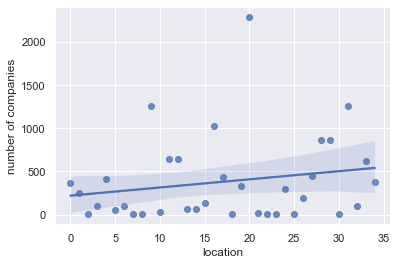

In [8]:
# LINEAR REGRESSION : Location
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading Dataset
df = pd.read_csv("location11.csv")
df.columns = ['location', 'number of companies']

#Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder
df['location'] = LabelEncoder().fit_transform(df['location'])

#Plotting Dataset
sns.set_theme(color_codes=True)
sns.regplot(x="location", y="number of companies", data=df);



In [26]:
#HYPOTHESIS 2
df = pd.read_csv("type11.csv")
df.columns = ['type of business', 'no. of companies']
df.head()


,type of business,no. of companies
0,Business Services,3442
1,Community personal & Social Services,1650
2,Trading,1556
3,Agriculture and Allied Activities,912
4,Manufacturing (Metals & Chemicals and products...,889


In [14]:
# Encoding Categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['type of business'] = labelencoder_X.fit_transform(df['type of business'])
df

,type of business,no. of companies
0,1,3442
1,2,1650
2,17,1556
3,0,912
4,10,889
5,3,780
6,9,611
7,7,538
8,5,439
9,18,423


In [15]:
def no_com(df):
    if df['no. of companies'] <= 660:
        return 0
    elif df['no. of companies'] >660:
        return 1
    else:
        return 'Indifferent'

df['no. of companies_new'] = df.apply(no_com, axis=1)


In [16]:
df_new=df
df_new = df.drop(columns=["no. of companies"])
df_new

,type of business,no. of companies_new
0,1,1
1,2,1
2,17,1
3,0,1
4,10,1
5,3,1
6,9,0
7,7,0
8,5,0
9,18,0


In [17]:
#DEGREE OF FREEDOM
stat, p, dof, expected = chi2_contingency(df_new)

print("The degree of freedom is: ", dof)

The degree of freedom is:  18


In [18]:
#CHI SQAURE TEST
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 1.0142604317547573e-06
Reject NULL HYPOTHESIS


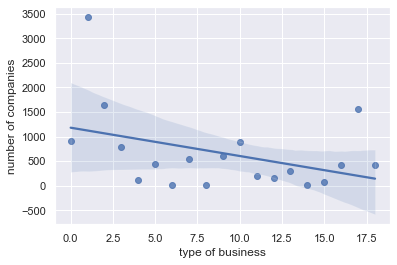

In [10]:
# LINEAR REGRESSION : Type Of Business
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading Dataset
df = pd.read_csv("type11.csv")
df.columns = ['type of business', 'number of companies']
df.head()

#Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder
df['type of business'] = LabelEncoder().fit_transform(df['type of business'])

#Plotting Dataset
sns.set_theme(color_codes=True)
sns.regplot(x="type of business", y="number of companies", data=df);